In [ ]:
#install nvidia for gpu
!pip install nvidia-smi

  Preparing metadata (setup.py) ... done
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7029 sha256=a7818c7ed80fb000e5fb58f01b5d0c361c3a94cb05230a8f8ee1fb0d582cb3ca
  Stored in directory: /root/.cache/pip/wheels/3d/fe/b0/27a9892da57472e538c7452a721a9cf463cc03cf7379889266
Successfully built littleutils


In [ ]:
#install module for yolov8
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 782.8/782.8 kB 9.8 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
#import necessary modules
import ultralytics
from ultralytics import YOLO
import cv2
import os
import torch

from IPython.display import display, Image
from IPython import display
display.clear_output()

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/Machine_Learning/human-detection-dataset.yolov8.zip

Archive:  /content/drive/MyDrive/Machine_Learning/human-detection-dataset.yolov8.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/104_png.rf.8ba552159be5809b81d0e94200571a4c.jpg  
 extracting: test/images/109_png.rf.da6b753a603cc86e905088824c84baf4.jpg  
 extracting: test/images/110_png.rf.72a796abf50592b022c68ee2aeccf7b0.jpg  
 extracting: test/images/116_png.rf.e794fd1cd1d24b9a5d006578b8d635ae.jpg  
 extracting: test/images/122_png.rf.3bb534af098856c3a1794f56f7821b7a.jpg  
 extracting: test/images/12_png.rf.74bb8e933c879420a5f34f663c1cdd96.jpg  
 extracting: test/images/130_png.rf.4edf6361f4faded9368ca6b1a5a9fe49.jpg  
 extracting: test/images/135_png.rf.03743c9fba9eae5612652b53c13d9819.jpg  
 extracting: test/images/139_png.rf.de756f4be0d0b766ee0d27c4364c79e7.jpg  
 extracting: test/images/142_png.rf.6ad35e8abecb7bf4950849cbc377085d.jpg  
 extrac

In [ ]:
#Create the YOLOv8 model
model = YOLO("yolov8m.pt")
model.info()

100%|██████████| 49.7M/49.7M [00:00<00:00, 330MB/s]


YOLOv8m summary: 295 layers, 25902640 parameters, 0 gradients, 79.3 GFLOPs


(295, 25902640, 0, 79.3204224)

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [ ]:
import torch

if torch.cuda.is_available():
    print(f"CUDA is available. PyTorch is using GPU: {torch.cuda.get_device_name(12.1)}")
else:
    print("CUDA is not available. PyTorch is using CPU.")

CUDA is available. PyTorch is using GPU: Tesla T4


In [ ]:
results = model.train(data='/content/data.yaml', epochs=100, imgsz=640, batch=16, optimizer='SGD', val=True, weight_decay=0.0005, nbs=64, lr0=0.001, lrf=0.001, device='cuda:12.1')


Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:12.1 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=cuda:12.1, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 41.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 202MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/train/labels... 491 images, 0 backgrounds, 0 corrupt: 100%|██████████| 491/491 [00:00<00:00, 1970.13it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/valid/labels... 59 images, 1 backgrounds, 0 corrupt: 100%|██████████| 59/59 [00:00<00:00, 1190.93it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: SGD(lr=0.001, momentum=0.937) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      7.45G      1.487      2.217      1.477         65        640: 100%|██████████| 31/31 [00:20<00:00,  1.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]

                   all         59        244      0.673      0.658      0.723      0.461



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      7.18G      1.292       1.41      1.357         52        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         59        244      0.749      0.775      0.842      0.597



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      7.29G      1.256       1.17      1.326         60        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]

                   all         59        244      0.779      0.844      0.884      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      7.27G      1.142     0.9511      1.246         27        640: 100%|██████████| 31/31 [00:15<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         59        244      0.863      0.791      0.881      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.13G      1.079     0.8625      1.185         69        640: 100%|██████████| 31/31 [00:15<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.855      0.807      0.893      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.26G      1.033     0.8115      1.157         62        640: 100%|██████████| 31/31 [00:15<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.40it/s]

                   all         59        244       0.83      0.843      0.903      0.656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.26G     0.9897     0.7534      1.128         42        640: 100%|██████████| 31/31 [00:15<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59        244      0.889      0.832      0.914      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.26G     0.9405     0.7181      1.095         60        640: 100%|██████████| 31/31 [00:15<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         59        244      0.854      0.816      0.904      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.18G     0.9391     0.7142      1.101         42        640: 100%|██████████| 31/31 [00:15<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]

                   all         59        244      0.879      0.844      0.914      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      7.25G     0.9189     0.6691      1.081         72        640: 100%|██████████| 31/31 [00:15<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.58it/s]

                   all         59        244      0.925      0.787      0.911      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.26G     0.8906     0.6378      1.066         39        640: 100%|██████████| 31/31 [00:15<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]

                   all         59        244      0.884      0.807      0.913       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.24G     0.9119     0.6398      1.074         52        640: 100%|██████████| 31/31 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.33it/s]

                   all         59        244      0.888      0.811      0.909      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.17G     0.8769     0.6115      1.056         55        640: 100%|██████████| 31/31 [00:16<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59        244      0.924      0.791      0.912       0.68



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.25G     0.8768      0.614      1.059         55        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.24it/s]

                   all         59        244      0.932      0.795      0.911      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.27G     0.8781     0.5824      1.054         73        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.17it/s]

                   all         59        244      0.879      0.832      0.922      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      7.27G     0.8432     0.5884      1.029         54        640: 100%|██████████| 31/31 [00:17<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.23it/s]

                   all         59        244      0.876      0.836      0.924      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      7.15G     0.7967     0.5397       1.02         52        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         59        244       0.93      0.819      0.922      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      7.24G     0.8114     0.5463      1.034         48        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]

                   all         59        244      0.893      0.851       0.92      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      7.26G     0.7937     0.5375      1.015         38        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         59        244      0.923      0.795      0.916      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      7.26G     0.8344     0.5416      1.028         46        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         59        244       0.93      0.824       0.92      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      7.19G     0.7856      0.525      1.013         76        640: 100%|██████████| 31/31 [00:15<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         59        244      0.941      0.782      0.902      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      7.24G     0.7709     0.5134      1.005         52        640: 100%|██████████| 31/31 [00:18<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:02<00:00,  1.20s/it]

                   all         59        244      0.907       0.82        0.9      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.27G     0.7652      0.497      1.002         54        640: 100%|██████████| 31/31 [00:17<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.59it/s]

                   all         59        244       0.91      0.829      0.911        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      7.26G     0.7653     0.5033      1.008         56        640: 100%|██████████| 31/31 [00:17<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         59        244      0.874      0.854      0.914      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      7.14G     0.7558     0.4967     0.9993         53        640: 100%|██████████| 31/31 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         59        244      0.891      0.828      0.916      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      7.27G     0.7627     0.5016     0.9939         64        640: 100%|██████████| 31/31 [00:15<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.52it/s]

                   all         59        244      0.877      0.848      0.913        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      7.27G     0.7407     0.4804     0.9955         54        640: 100%|██████████| 31/31 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.56it/s]

                   all         59        244      0.892      0.852      0.913      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      7.23G     0.7132     0.4719     0.9844         41        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.64it/s]

                   all         59        244       0.89       0.84      0.915      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      7.17G     0.7324     0.4742     0.9821         41        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.906      0.848      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      7.27G     0.7244     0.4796     0.9835         48        640: 100%|██████████| 31/31 [00:16<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59        244      0.861      0.869      0.915      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      7.25G     0.7034     0.4673     0.9752         64        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         59        244      0.916      0.828      0.907      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      7.24G     0.7086     0.4647     0.9879         50        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.21it/s]

                   all         59        244      0.887      0.838      0.917      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      7.17G     0.7245      0.479      0.992         30        640: 100%|██████████| 31/31 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.22it/s]

                   all         59        244       0.87      0.852      0.909      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      7.25G     0.6785     0.4652     0.9692         55        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59        244      0.853      0.858      0.915      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      7.24G     0.7042     0.4611     0.9866         64        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.934      0.787      0.916        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      7.25G     0.6863     0.4495     0.9612         69        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.39it/s]

                   all         59        244       0.93      0.799      0.916      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      7.16G     0.7034     0.4536     0.9715         39        640: 100%|██████████| 31/31 [00:16<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         59        244      0.923      0.816      0.917      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      7.26G     0.6799     0.4357     0.9664         41        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.877      0.861      0.923       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      7.26G     0.6891     0.4554      0.972         56        640: 100%|██████████| 31/31 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.47it/s]

                   all         59        244      0.913      0.824      0.914      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      7.25G     0.6838     0.4434     0.9797         53        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.72it/s]

                   all         59        244      0.906      0.811      0.912      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      7.14G     0.6783     0.4284     0.9737         47        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         59        244      0.874      0.848      0.912      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.24G     0.6826     0.4449     0.9648         61        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         59        244      0.926      0.787      0.911      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      7.24G     0.6791     0.4347     0.9651         37        640: 100%|██████████| 31/31 [00:18<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]

                   all         59        244      0.898      0.826      0.918      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      7.24G     0.6463     0.4206     0.9503         64        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.17it/s]

                   all         59        244      0.858      0.867      0.919        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      7.14G     0.6606     0.4299     0.9676         50        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.41it/s]

                   all         59        244      0.887      0.868      0.919      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      7.25G     0.6689     0.4302     0.9627         43        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.884      0.861      0.924      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       7.2G     0.6729     0.4332     0.9659         69        640: 100%|██████████| 31/31 [00:15<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.54it/s]

                   all         59        244      0.912      0.846      0.924      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      7.28G     0.6366     0.4123     0.9588         56        640: 100%|██████████| 31/31 [00:15<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         59        244      0.908      0.852      0.926      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      7.17G     0.6515     0.4181     0.9536         58        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.73it/s]

                   all         59        244      0.881      0.836      0.923      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      7.21G     0.6613     0.4227     0.9517         37        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         59        244      0.888      0.836      0.916      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      7.25G     0.6399     0.4227     0.9535         58        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         59        244      0.891      0.841      0.913      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.23G     0.6193     0.4009     0.9435         49        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59        244      0.904      0.852      0.919      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.12G     0.6233     0.4067     0.9455         34        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.31it/s]

                   all         59        244      0.913      0.857      0.922      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      7.27G     0.6474     0.4207     0.9523         50        640: 100%|██████████| 31/31 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         59        244      0.935      0.827      0.924      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      7.21G     0.6112      0.392     0.9463         35        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.05it/s]

                   all         59        244      0.923      0.852      0.928      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      7.24G     0.6246     0.3919     0.9625         30        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.31it/s]

                   all         59        244       0.92      0.851      0.922      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      7.17G     0.6224     0.3993     0.9445         50        640: 100%|██████████| 31/31 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.51it/s]

                   all         59        244      0.898      0.852      0.918      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      7.27G     0.6002     0.3988     0.9301         45        640: 100%|██████████| 31/31 [00:15<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         59        244        0.9      0.846      0.914      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      7.22G     0.6299     0.3997     0.9397         59        640: 100%|██████████| 31/31 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.36it/s]

                   all         59        244      0.913      0.828      0.909      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      7.27G     0.6218     0.4027     0.9454         92        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         59        244      0.906      0.834      0.915      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      7.14G     0.6142     0.3877     0.9302         56        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.62it/s]

                   all         59        244      0.938       0.84      0.915      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.26G     0.6261     0.4034     0.9448         58        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.48it/s]

                   all         59        244      0.935      0.824      0.921      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.24G     0.6118     0.3869     0.9299         64        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.53it/s]

                   all         59        244      0.912      0.832       0.92       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.26G     0.6069     0.3826     0.9373         57        640: 100%|██████████| 31/31 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         59        244      0.895      0.852      0.918      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.16G     0.5826     0.3739     0.9236         38        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.15it/s]

                   all         59        244      0.902      0.861      0.916      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.24G     0.6118       0.39     0.9441         67        640: 100%|██████████| 31/31 [00:16<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59        244      0.901      0.858      0.918      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.25G     0.6014      0.382     0.9371         72        640: 100%|██████████| 31/31 [00:16<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59        244      0.883      0.863       0.92      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.23G     0.5871     0.3838     0.9411         54        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.35it/s]

                   all         59        244      0.888      0.857      0.921      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.15G     0.6106     0.3973     0.9307         63        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.14it/s]

                   all         59        244      0.897      0.852      0.923      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      7.27G     0.5733     0.3701     0.9205         66        640: 100%|██████████| 31/31 [00:16<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.32it/s]

                   all         59        244      0.911      0.848      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.25G     0.5938     0.3771     0.9393         43        640: 100%|██████████| 31/31 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         59        244       0.92      0.861      0.922      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.21G      0.583     0.3777     0.9282         56        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]

                   all         59        244      0.928      0.839      0.921      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      7.12G     0.6001     0.3822     0.9422         51        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         59        244      0.878      0.885       0.92      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      7.23G     0.5735     0.3633     0.9151         74        640: 100%|██████████| 31/31 [00:16<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59        244      0.918      0.852      0.924      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      7.23G     0.5775     0.3734     0.9291         55        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.19it/s]

                   all         59        244      0.918      0.848      0.918      0.711



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      7.22G     0.5571     0.3525     0.9157         66        640: 100%|██████████| 31/31 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59        244      0.892      0.873      0.921      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      7.13G     0.5918     0.3693     0.9331         46        640: 100%|██████████| 31/31 [00:16<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.11it/s]

                   all         59        244      0.905      0.861      0.916      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      7.24G     0.5773     0.3648     0.9255         49        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]

                   all         59        244      0.914      0.867      0.921      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      7.27G      0.597       0.38     0.9314         60        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.28it/s]

                   all         59        244       0.91      0.861      0.918      0.713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      7.26G     0.5546     0.3586     0.9154         38        640: 100%|██████████| 31/31 [00:16<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.43it/s]

                   all         59        244      0.913      0.863      0.918      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      7.15G     0.5415       0.36     0.9092         35        640: 100%|██████████| 31/31 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.61it/s]

                   all         59        244      0.914      0.869      0.917      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      7.26G     0.5894     0.3841     0.9299         54        640: 100%|██████████| 31/31 [00:16<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.29it/s]

                   all         59        244      0.909      0.863       0.92      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.26G     0.5834     0.3665     0.9325         51        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.57it/s]

                   all         59        244      0.898      0.865       0.92       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.25G     0.5852     0.3701     0.9353         52        640: 100%|██████████| 31/31 [00:17<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         59        244      0.904      0.869       0.92      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.14G     0.5784     0.3736     0.9282         67        640: 100%|██████████| 31/31 [00:15<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.80it/s]

                   all         59        244       0.92      0.861      0.921      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      7.23G     0.5782     0.3686     0.9252         73        640: 100%|██████████| 31/31 [00:16<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.63it/s]

                   all         59        244      0.925      0.861       0.92      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      7.23G     0.5469     0.3501     0.9171         44        640: 100%|██████████| 31/31 [00:16<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.70it/s]

                   all         59        244      0.917      0.852      0.922      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      7.24G     0.5426     0.3487     0.9149         30        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.32it/s]

                   all         59        244      0.905      0.861      0.924      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      7.16G     0.5537     0.3536     0.9145         41        640: 100%|██████████| 31/31 [00:16<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.26it/s]

                   all         59        244      0.911      0.861      0.923      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      7.31G     0.5665     0.3616     0.9172         50        640: 100%|██████████| 31/31 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.20it/s]

                   all         59        244      0.917       0.86      0.919      0.716


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      7.21G     0.4708     0.2931      0.869         22        640: 100%|██████████| 31/31 [00:18<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.07it/s]

                   all         59        244      0.911      0.877      0.919      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      7.21G     0.4847     0.2934     0.8684         27        640: 100%|██████████| 31/31 [00:17<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.27it/s]

                   all         59        244      0.933      0.858      0.917      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      7.12G     0.4793     0.2912      0.869         16        640: 100%|██████████| 31/31 [00:17<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.30it/s]

                   all         59        244       0.92      0.869      0.916      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      7.22G     0.4664     0.2856     0.8662         32        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]

                   all         59        244      0.926       0.87      0.917      0.703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      7.25G     0.4723     0.2864     0.8646         31        640: 100%|██████████| 31/31 [00:16<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.38it/s]

                   all         59        244      0.924      0.869      0.918      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      7.23G     0.4657     0.2825     0.8706         15        640: 100%|██████████| 31/31 [00:16<00:00,  1.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.50it/s]

                   all         59        244      0.925      0.869      0.918      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      7.17G     0.4526     0.2808      0.857         26        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.42it/s]

                   all         59        244      0.917      0.869      0.917      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      7.22G     0.4671     0.2811     0.8617         42        640: 100%|██████████| 31/31 [00:16<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.25it/s]

                   all         59        244      0.924      0.869      0.917      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      7.21G     0.4545     0.2725     0.8507         38        640: 100%|██████████| 31/31 [00:16<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.18it/s]

                   all         59        244      0.924      0.865      0.918       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      7.24G     0.4718     0.2827     0.8605         38        640: 100%|██████████| 31/31 [00:16<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  2.29it/s]

                   all         59        244      0.925      0.869      0.918      0.707



100 epochs completed in 0.534 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train/weights/best.pt, 52.0MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:12.1 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:01<00:00,  1.34it/s]


                   all         59        244      0.916      0.852      0.923      0.717
Speed: 0.3ms preprocess, 11.6ms inference, 0.0ms loss, 1.8ms postprocess per image
Results saved to runs/detect/train


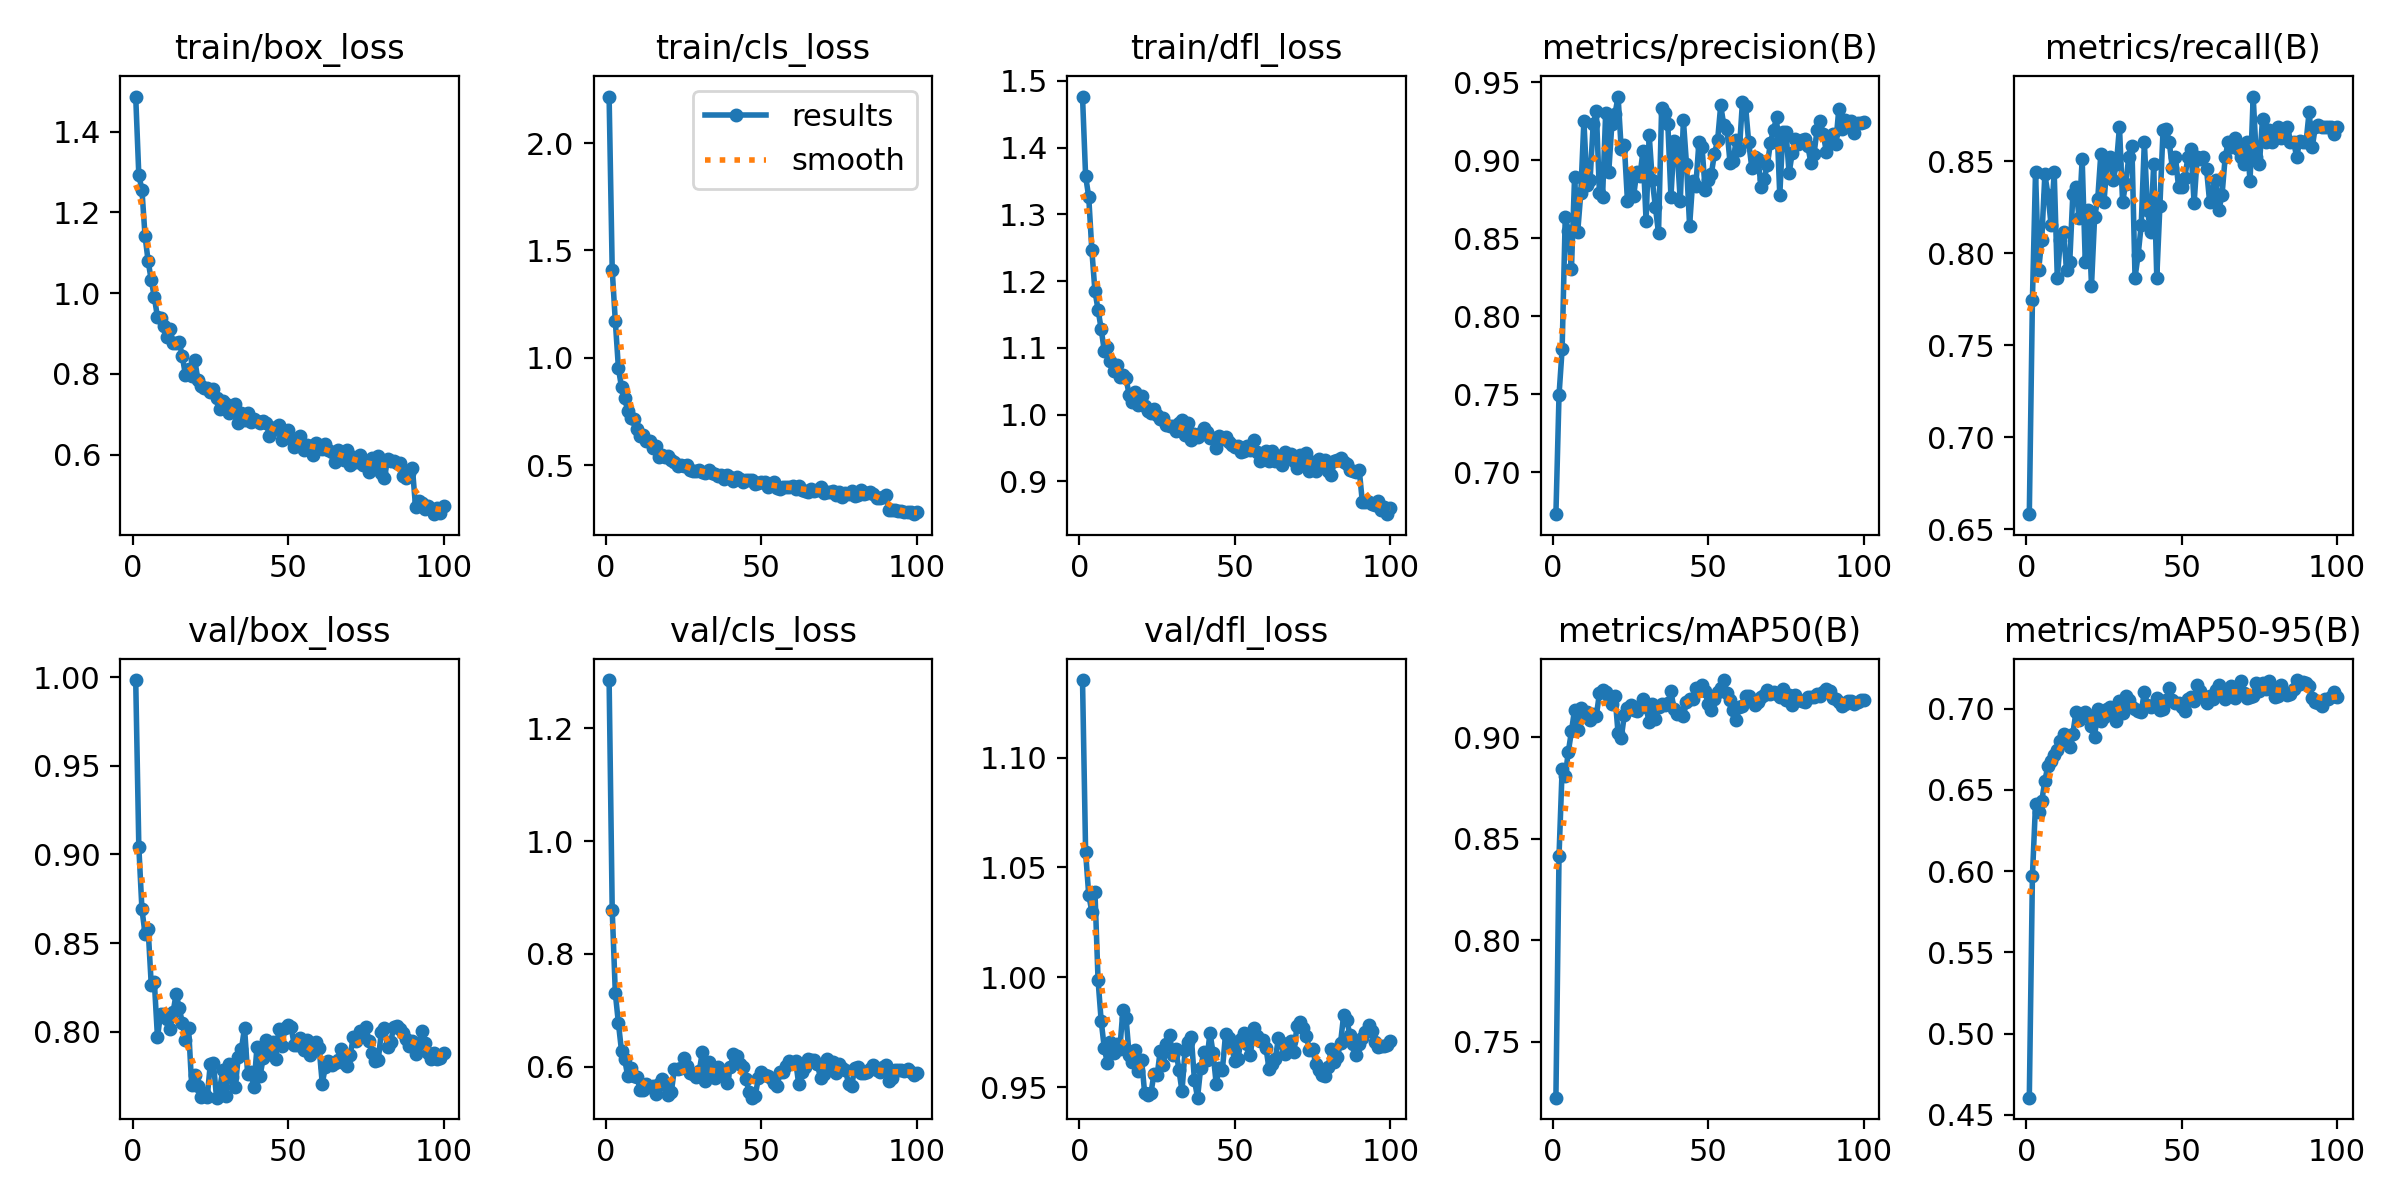

In [ ]:
Image(filename=f'/content/runs/detect/train/results.png', width=700)

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/data.yaml

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/valid/labels.cache... 59 images, 1 backgrounds, 0 corrupt: 100% 59/59 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [01:31<00:00, 22.84s/it]
                   all         59        244      0.912      0.848      0.915      0.714
Speed: 9.7ms preprocess, 1521.2ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [ ]:
#get weight for predict
!yolo predict model='/content/runs/detect/train/weights/best.pt' source='/content/test/images'

Ultralytics YOLOv8.2.35 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.00GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

image 1/30 /content/test/images/104_png.rf.8ba552159be5809b81d0e94200571a4c.jpg: 640x640 2 persons, 1428.9ms
image 2/30 /content/test/images/109_png.rf.da6b753a603cc86e905088824c84baf4.jpg: 640x640 3 persons, 1257.3ms
image 3/30 /content/test/images/110_png.rf.72a796abf50592b022c68ee2aeccf7b0.jpg: 640x640 2 persons, 1259.9ms
image 4/30 /content/test/images/116_png.rf.e794fd1cd1d24b9a5d006578b8d635ae.jpg: 640x640 1 person, 1279.5ms
image 5/30 /content/test/images/122_png.rf.3bb534af098856c3a1794f56f7821b7a.jpg: 640x640 1 person, 862.5ms
image 6/30 /content/test/images/12_png.rf.74bb8e933c879420a5f34f663c1cdd96.jpg: 640x640 1 person, 801.6ms
image 7/30 /content/test/images/130_png.rf.4edf6361f4faded9368ca6b1a5a9fe49.jpg: 640x640 1 person, 796.4ms
image 8/30 /content/test/images/135_png.rf.03743c9fba9eae5612652b53c13d9819.jpg

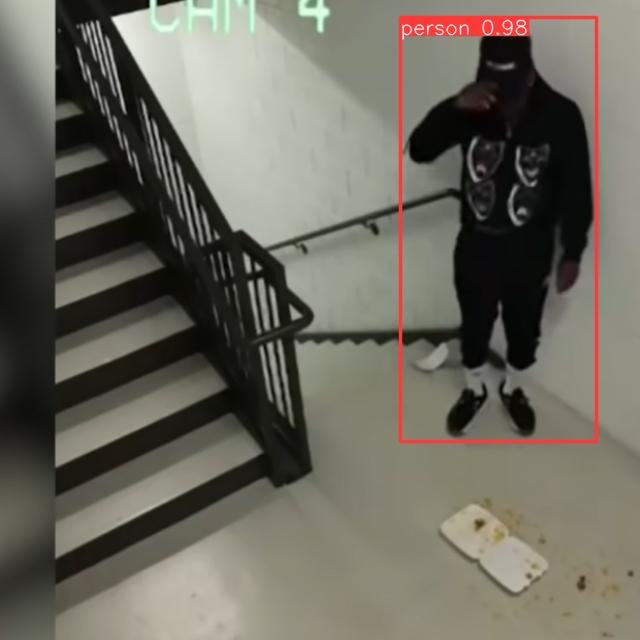

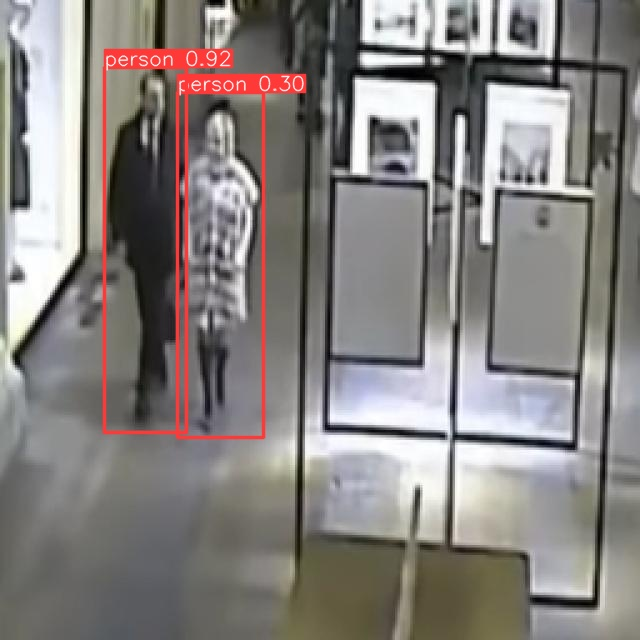

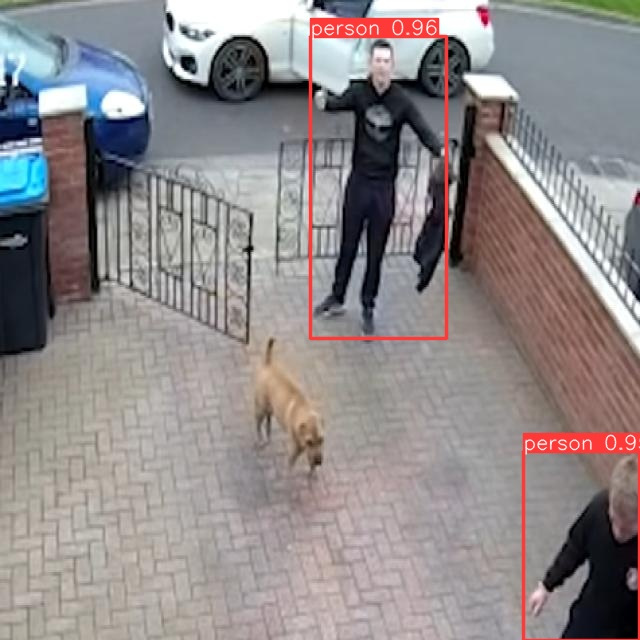

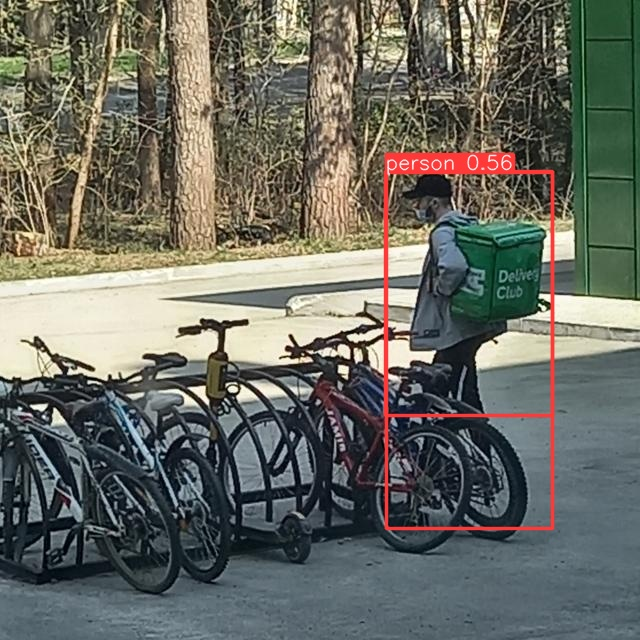

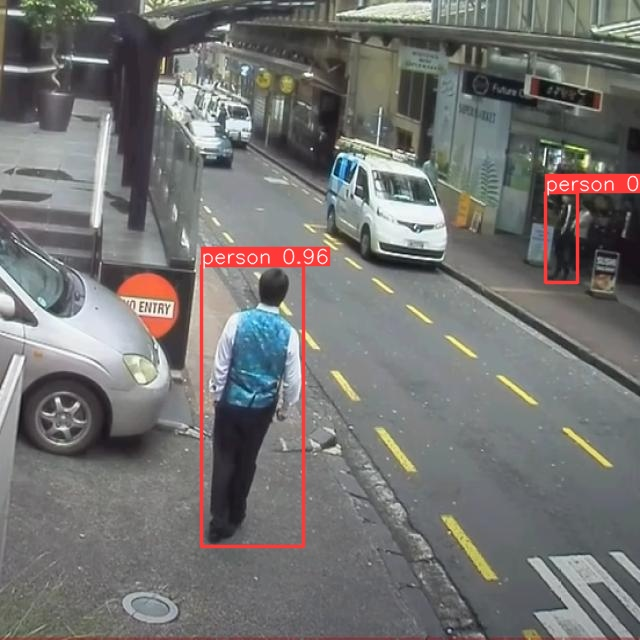

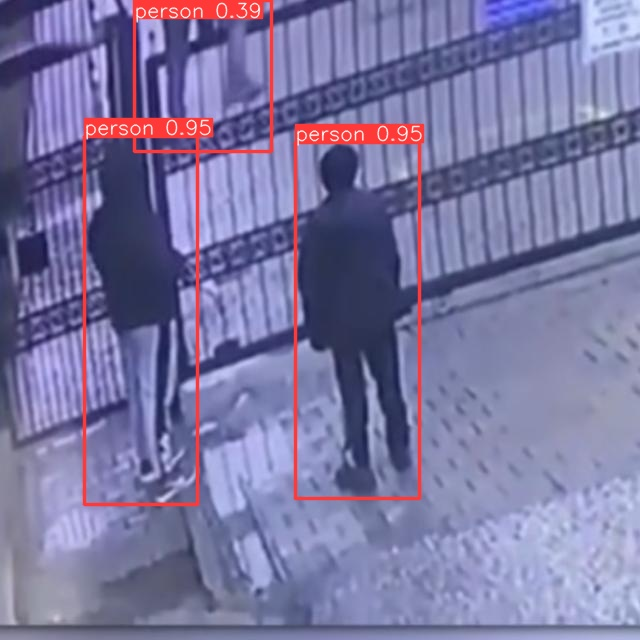

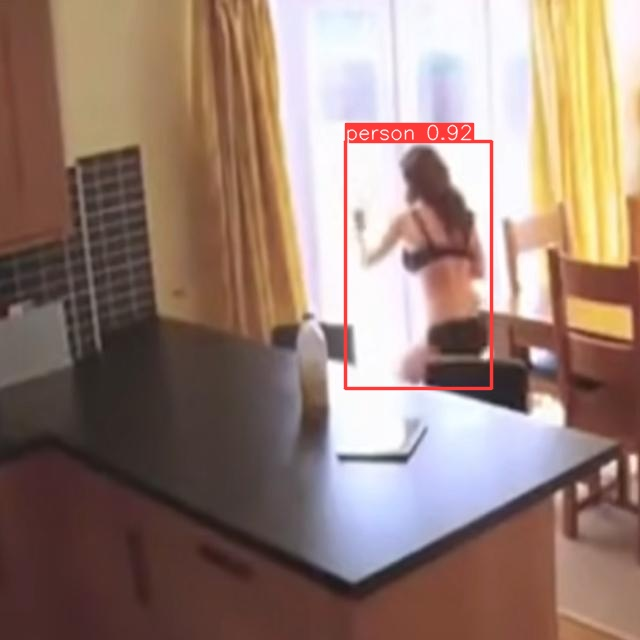

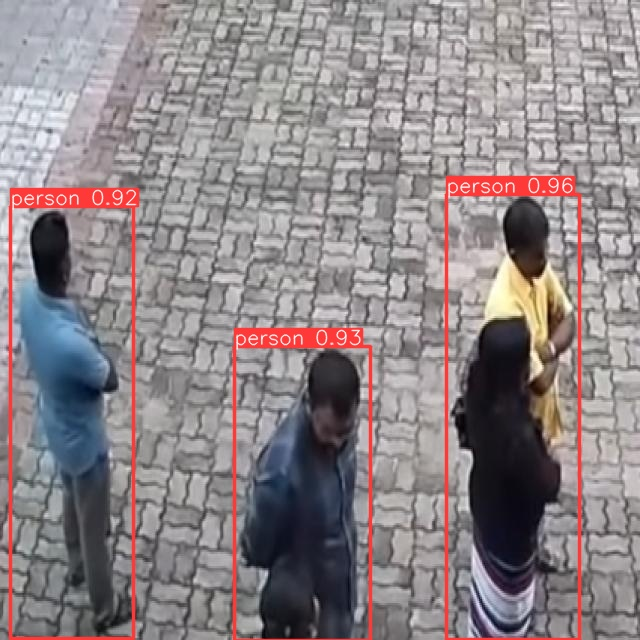

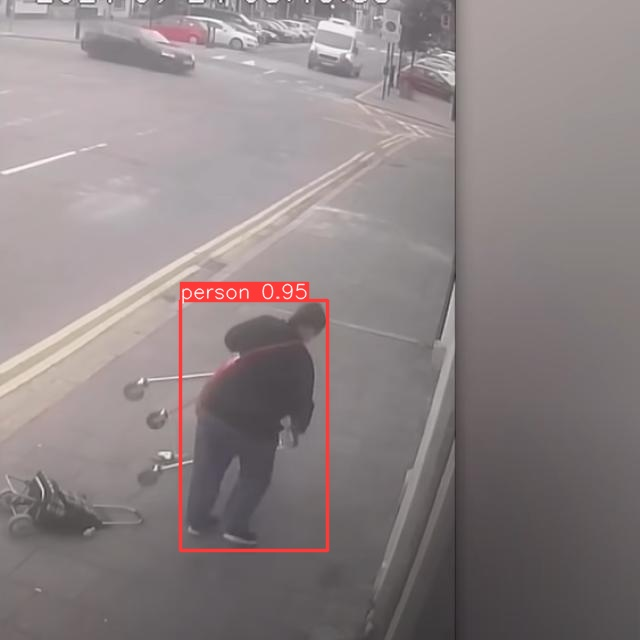

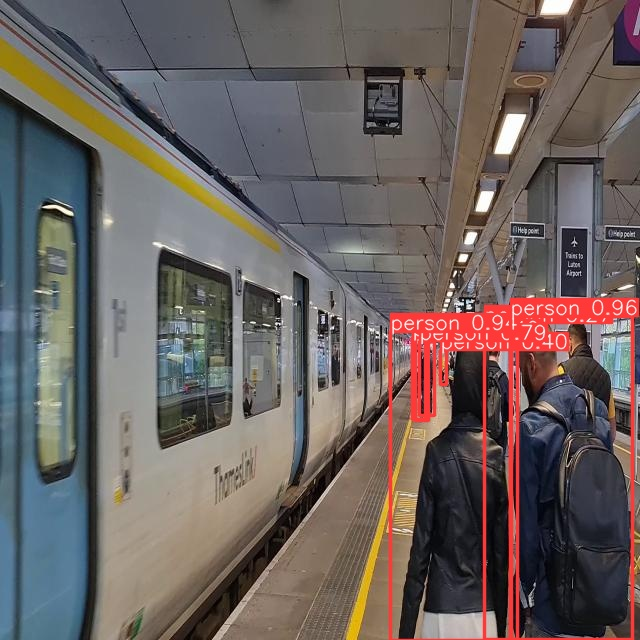

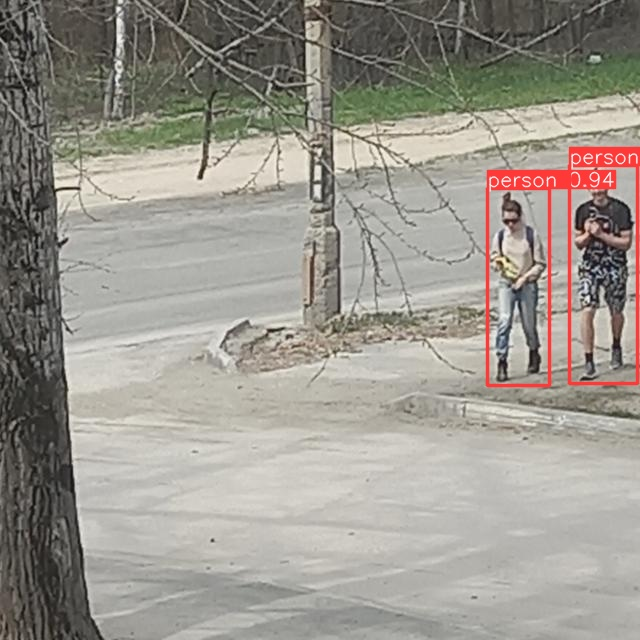

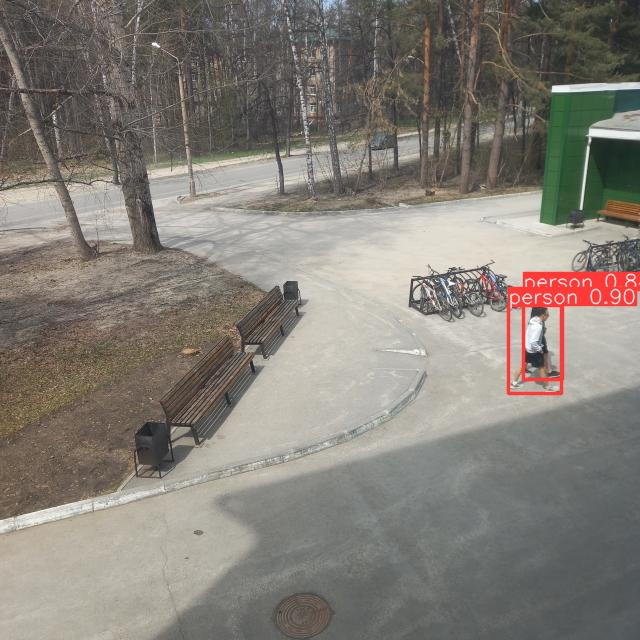

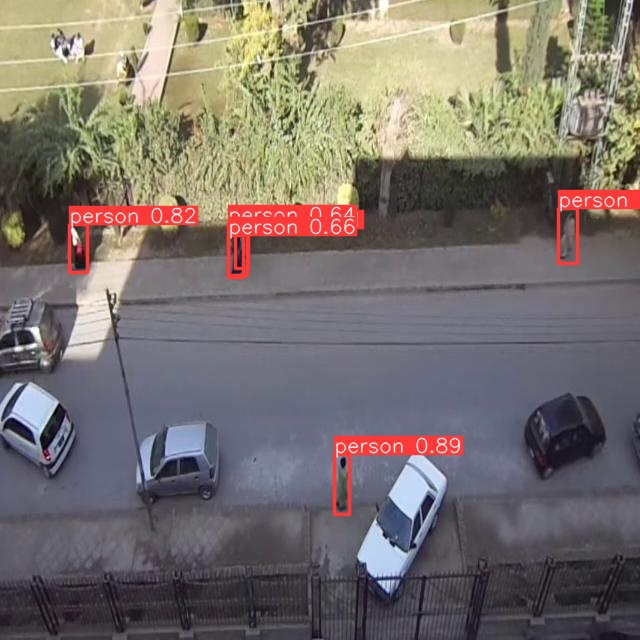

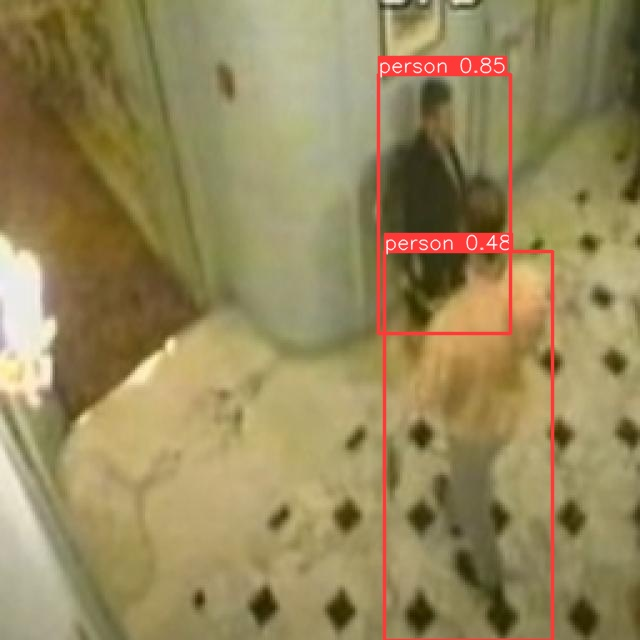

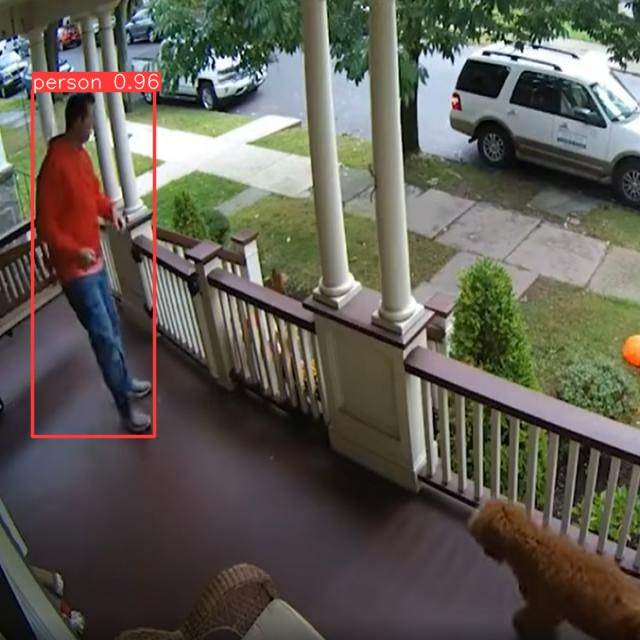

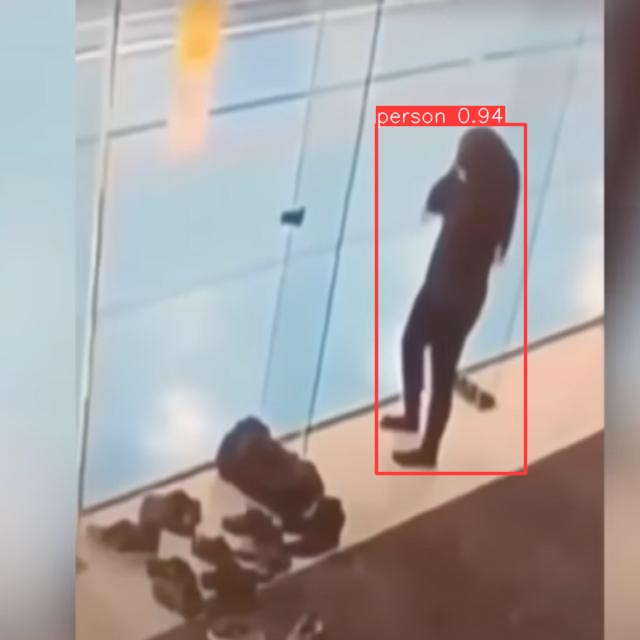

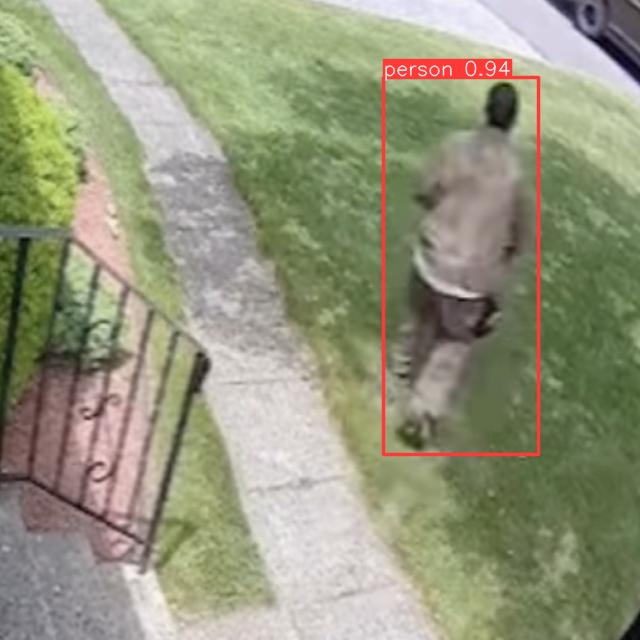

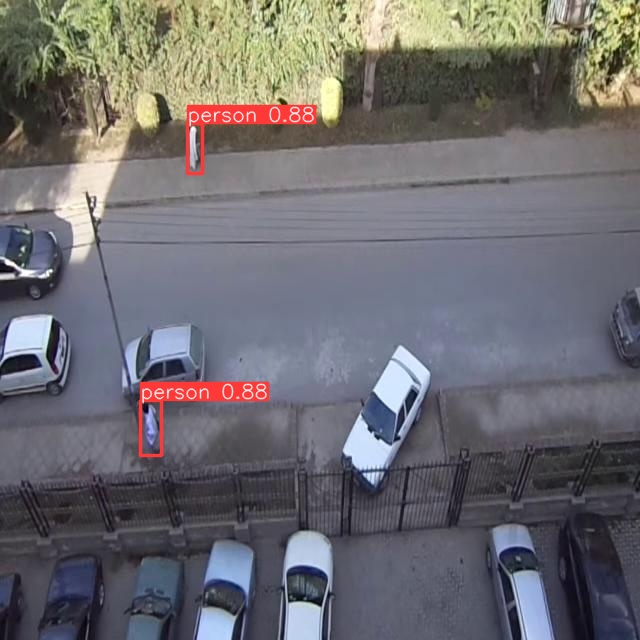

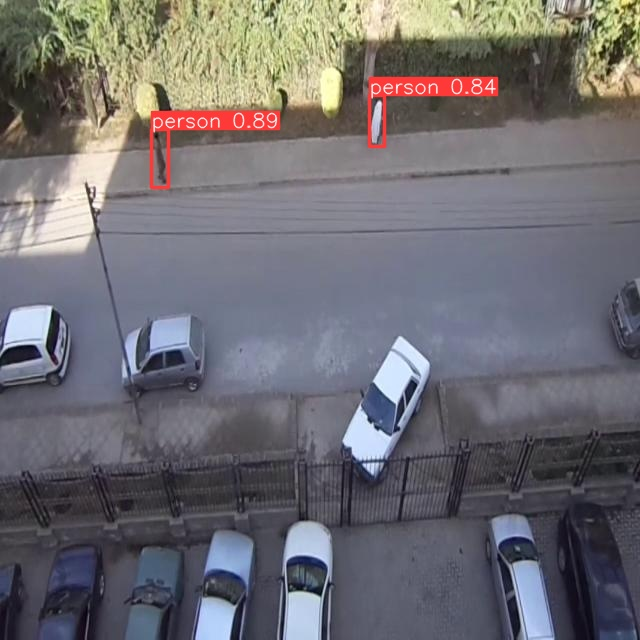

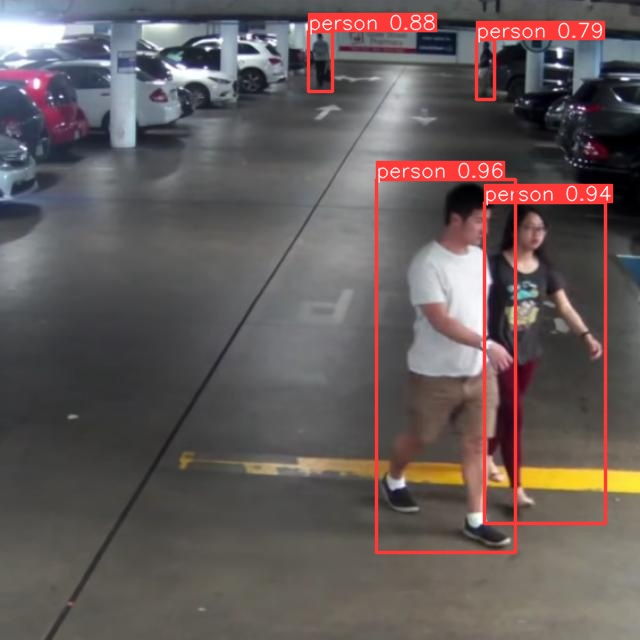

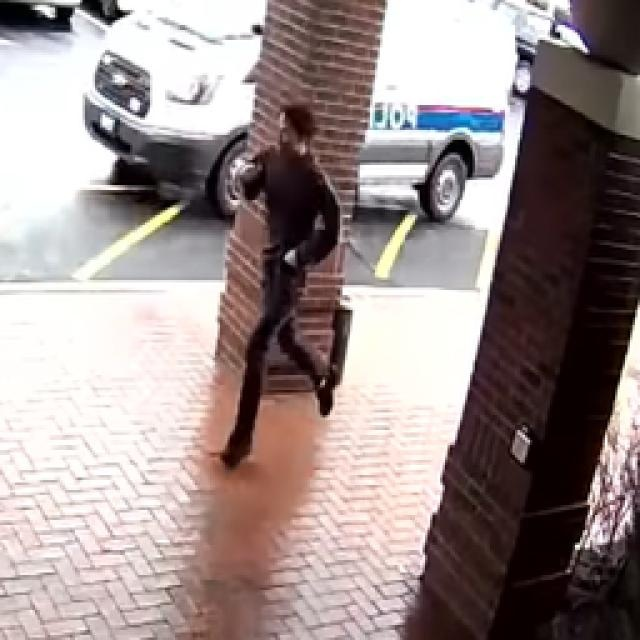

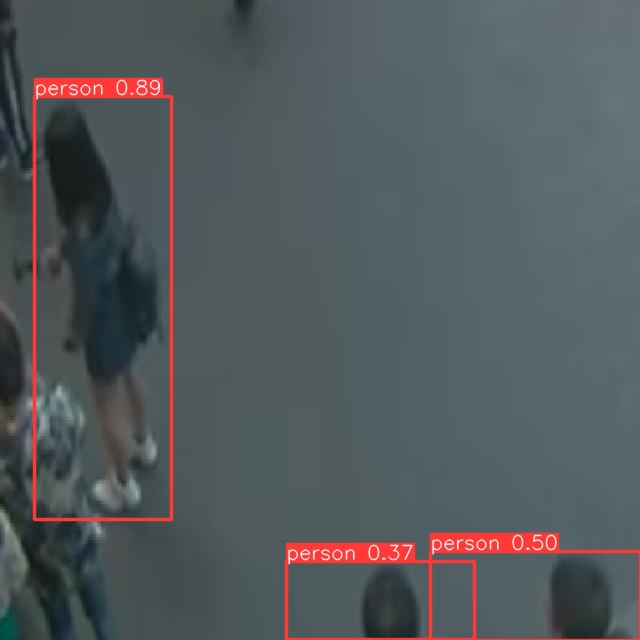

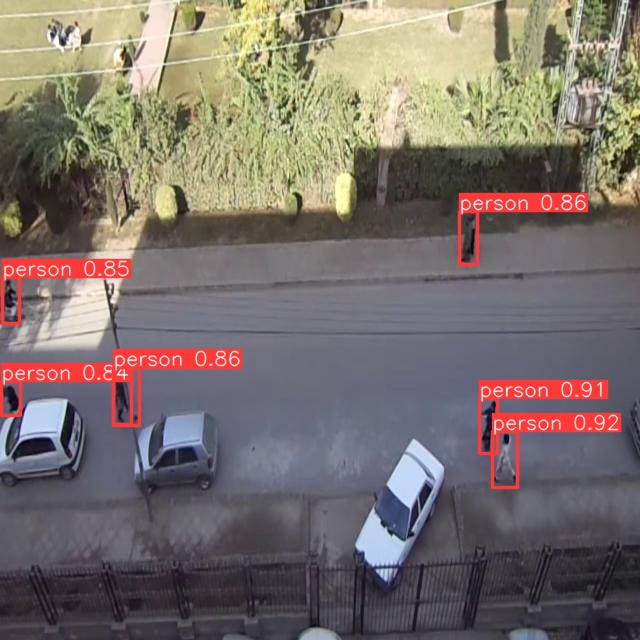

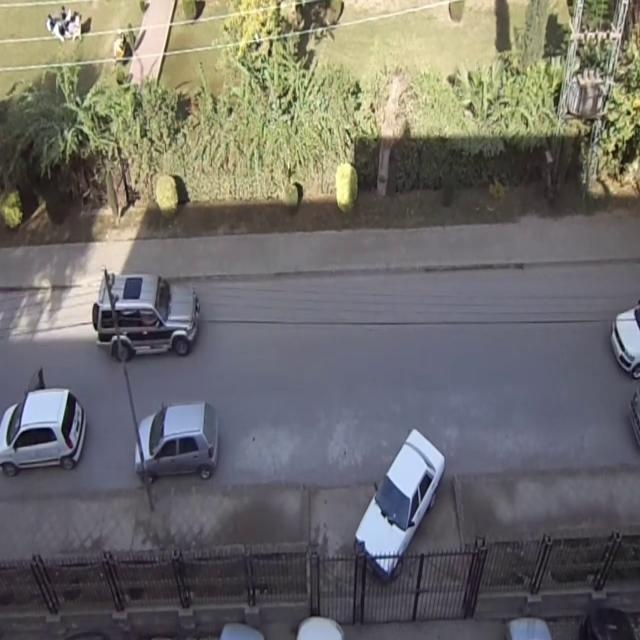

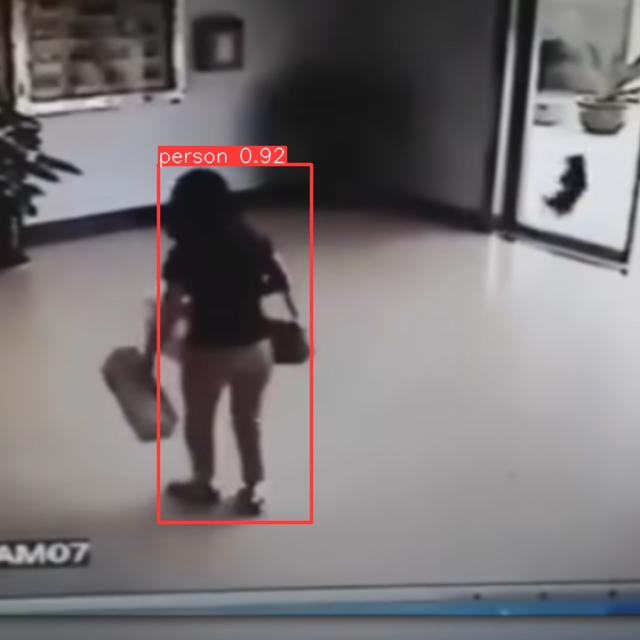

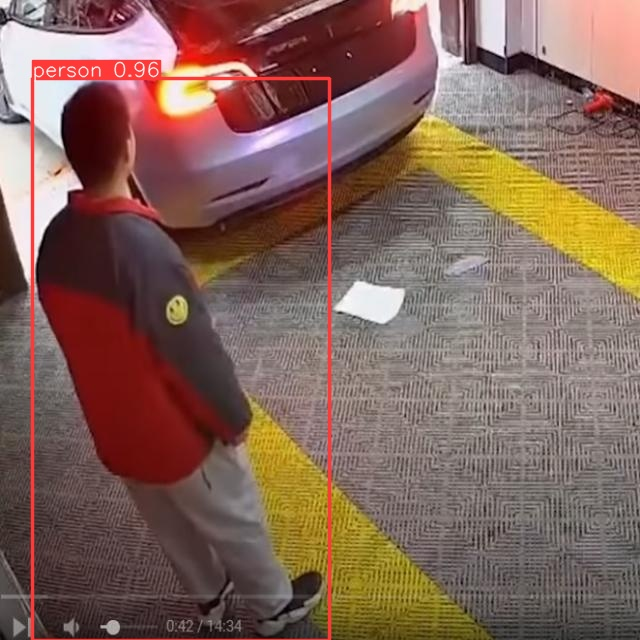

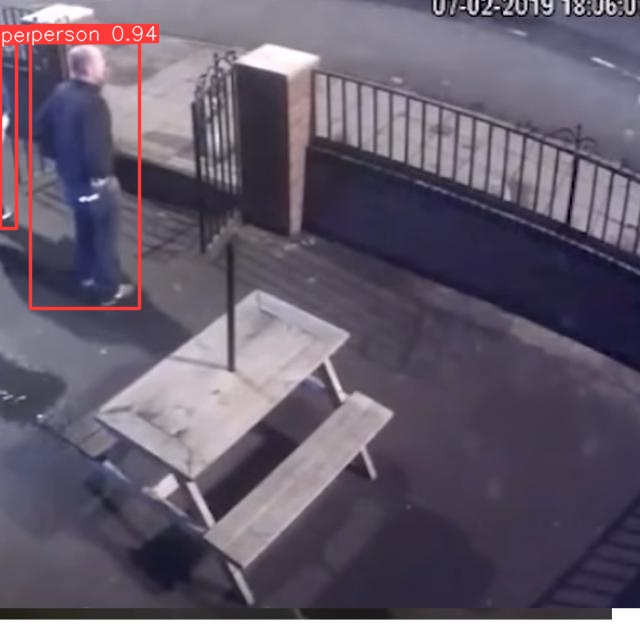

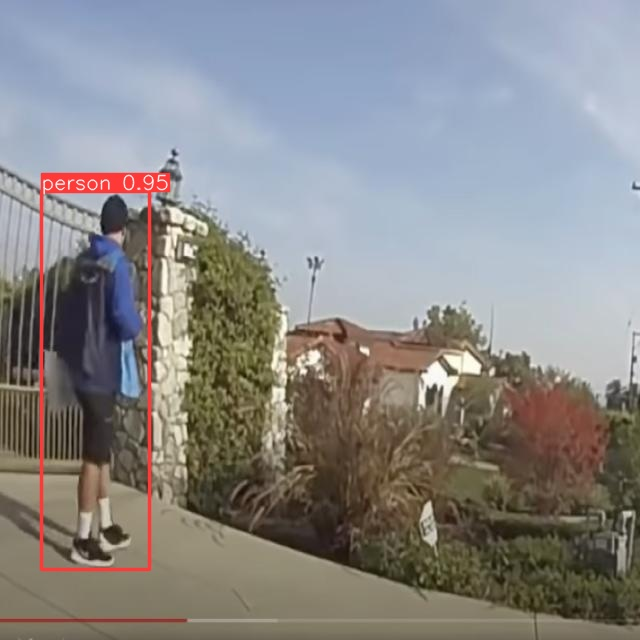

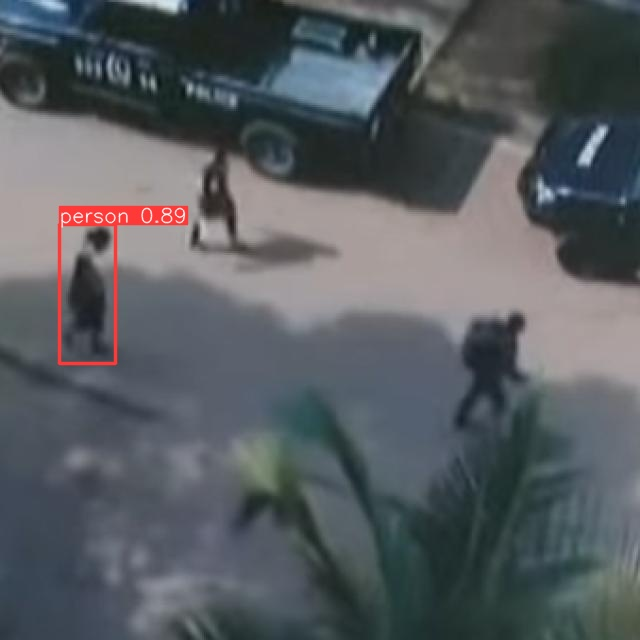

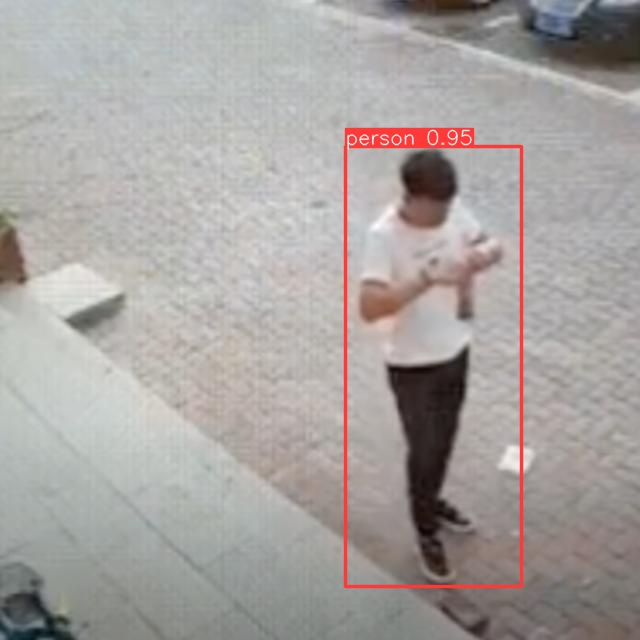

In [ ]:
#detection from test images
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg'):
        display(Image(filename=image_path, height=700))
        print("\n")

In [ ]:
#detection with test video
!yolo detect predict model='/content/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/human_detection_raw_video.mp4' show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 1055.1ms
video 1/1 (frame 2/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 907.4ms
video 1/1 (frame 3/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 1137.7ms
video 1/1 (frame 4/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 885.4ms
video 1/1 (frame 5/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 852.2ms
video 1/1 (frame 6/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no detections), 918.7ms
video 1/1 (frame 7/432) /content/drive/MyDrive/human_detection_raw_video.mp4: 480x640 (no de

In [ ]:
!pip install 'tensorflow==2.15.1' ultralytics
import ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.6 MB/s eta 0:00:00
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.13.0
    Uninstalling tensorflow-estimator-2.13.0:
      Successfully uninstalled tensorflow-estimator-2.13.0
  Attempting uninstall: keras
    Found existing installation: keras 3.3.3
    Uninstalling keras-3.3.3:
      Successfully uninstalled keras-3.3.3
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.16.2
    Uninstalling tensorboard-2.16.2:
      Successfully uninstalled tensorboard-2.16.2
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.16.1
    Uninstalling tensorflow-2.16.1:
      Successfully un

In [ ]:
tflite_model = YOLO("/content/runs/detect/train/weights/best_saved_model/best_float32.tflite")
results = tflite_model("/content/drive/MyDrive/Machine_Learning/input.mp4")

Loading /content/runs/detect/train/weights/best_saved_model/best_float32.tflite for TensorFlow Lite inference...


WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 640x640 1 person, 1372.7ms
video 1/1 (frame 2/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 640x640 1 person, 1291.5ms
video 1/1 (frame 3/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 640x640 1 person, 1

In [3]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
!pip install 'tensorflow==2.15.0' ultralytics
import ultralytics

# Load the YOLOv8 model
model = YOLO("/content/drive/MyDrive/Machine_Learning/best.pt")

# Export the model to TFLite format
model.export(format="tflite")  # creates 'yolov8n_float32.tflite'

# Load the exported TFLite model
tflite_model = YOLO("best_float32.tflite")

In [ ]:
from IPython.display import display, Javascript,HTML
from google.colab.output import eval_js
from base64 import b64decode

def record_video(filename):
  js=Javascript("""
    async function recordVideo() {
      const options = { mimeType: "video/webm; codecs=vp9" };
      const div = document.createElement('div');
      const capture = document.createElement('button');
      const stopCapture = document.createElement("button");

      capture.textContent = "Start Recording";
      capture.style.background = "yellow";
      capture.style.color = "black";

      stopCapture.textContent = "Stop Recording";
      stopCapture.style.background = "red";
      stopCapture.style.color = "white";
      div.appendChild(capture);

      const video = document.createElement('video');
      const recordingVid = document.createElement("video");
      video.style.display = 'block';

      const stream = await navigator.mediaDevices.getUserMedia({audio:true, video: true});

      let recorder = new MediaRecorder(stream, options);
      document.body.appendChild(div);
      div.appendChild(video);

      video.srcObject = stream;
      video.muted = true;

      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => {
        capture.onclick = resolve;
      });
      recorder.start();
      capture.replaceWith(stopCapture);

      await new Promise((resolve) => stopCapture.onclick = resolve);
      recorder.stop();
      let recData = await new Promise((resolve) => recorder.ondataavailable = resolve);
      let arrBuff = await recData.data.arrayBuffer();

      // stop the stream and remove the video element
      stream.getVideoTracks()[0].stop();
      div.remove();

      let binaryString = "";
      let bytes = new Uint8Array(arrBuff);
      bytes.forEach((byte) => {
        binaryString += String.fromCharCode(byte);
      })
    return btoa(binaryString);
    }
  """)
  try:
    display(js)
    data=eval_js('recordVideo({})')
    binary=b64decode(data)
    with open(filename,"wb") as video_file:
      video_file.write(binary)
    print(f"Finished recording video at:{filename}")
  except Exception as err:
    print(str(err))

# Set path to save video here
video_path = "/content/drive/MyDrive/Machine_Learning/input.mp4"
record_video(video_path)


<IPython.core.display.Javascript object>

Finished recording video at:/content/drive/MyDrive/Machine_Learning/input.mp4


In [ ]:
#detection with test video
!yolo detect predict model='/content/runs/detect/train/weights/best.pt' source='/content/drive/MyDrive/Machine_Learning/input.mp4' show=True

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs

video 1/1 (frame 1/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 990.4ms
video 1/1 (frame 2/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 1493.6ms
video 1/1 (frame 3/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 1476.9ms
video 1/1 (frame 4/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 1578.6ms
video 1/1 (frame 5/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 1580.8ms
video 1/1 (frame 6/-73786976294838208) /content/drive/MyDrive/Machine_Learning/input.mp4: 480x640 1 person, 1037.9ms
video 1/1 (frame 7/-73786976294838208) /content/drive/MyDri